<a href="https://colab.research.google.com/github/kvalaroutsos/Paddy_Classification_Kaggle/blob/main/PADDY_cLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install Kaggle
!pip install -q kaggle

from google.colab import files
files.upload()

#Create a kaggle folder
! mkdir ~/.kaggle

# Copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/


# Copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

#Permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

#! kaggle competitions download -c amex-default-prediction

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle competitions download -c paddy-disease-classification

 98% 1.00G/1.02G [00:05<00:00, 181MB/s]
100% 1.02G/1.02G [00:05<00:00, 205MB/s]


In [ ]:
! unzip paddy-disease-classification.zip

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: train_images/downy_mildew/100992.jpg  
  inflating: train_images/downy_mildew/100995.jpg  
  inflating: train_images/downy_mildew/101015.jpg  
  inflating: train_images/downy_mildew/101020.jpg  
  inflating: train_images/downy_mildew/101022.jpg  
  inflating: train_images/downy_mildew/101024.jpg  
  inflating: train_images/downy_mildew/101034.jpg  
  inflating: train_images/downy_mildew/101050.jpg  
  inflating: train_images/downy_mildew/101078.jpg  
  inflating: train_images/downy_mildew/101096.jpg  
  inflating: train_images/downy_mildew/101103.jpg  
  inflating: train_images/downy_mildew/101114.jpg  
  inflating: train_images/downy_mildew/101119.jpg  
  inflating: train_images/downy_mildew/101142.jpg  
  inflating: train_images/downy_mildew/101177.jpg  
  inflating: train_images/downy_mildew/101178.jpg  
  inflating: train_images/downy_mildew/101181.jpg  
  inflating: train_images/downy_mildew/101205.jpg  
  inflati

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import img_to_array, load_img

from IPython.core.display import display

import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [ ]:
from matplotlib import image

In [ ]:
img = image.imread('/content/train_images/hispa/100005.jpg')

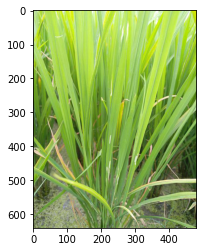

In [ ]:
plt.imshow(img)

In [ ]:
my_train_dir='/content/train_images'
my_test_dir='/content/test_images'

In [ ]:
os.listdir(my_train_dir)

['bacterial_leaf_streak',
 'brown_spot',
 'downy_mildew',
 'dead_heart',
 'bacterial_leaf_blight',
 'hispa',
 'normal',
 'blast',
 'bacterial_panicle_blight',
 'tungro']

In [ ]:
containts=os.listdir(my_train_dir)

In [ ]:
for item in containts:
  print(f"{item} are {len(os.listdir(my_train_dir+'/'+item))} images")

bacterial_leaf_streak are 380 images
brown_spot are 965 images
downy_mildew are 620 images
dead_heart are 1442 images
bacterial_leaf_blight are 479 images
hispa are 1594 images
normal are 1764 images
blast are 1738 images
bacterial_panicle_blight are 337 images
tungro are 1088 images


In [ ]:
# Examine the mean image shape
dim1=[]
dim2=[]
for item in containts:

  for image_filename in os.listdir(my_train_dir+'/'+item):

    img=image.imread(my_train_dir+'/'+item+'/'+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


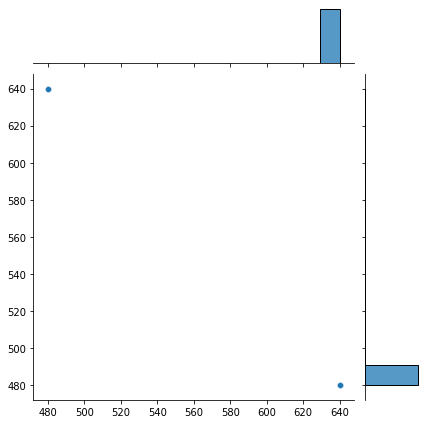

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
np.mean(dim2)

480.0614970692803

In [ ]:
#image_shape=(640,480,3)
# In order to have lesser paraeters i downgrded image quality
image_shape=(320,240,3)

In [ ]:
#Data augmentation in order to have a robust model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
os.mkdir('val')
# I construv validation files to evaluate the model in which train images will be moved in 

In [ ]:
for item in containts:
  directory=item
  parent_dir='val/'
  path=os.path.join(parent_dir,directory)
  os.mkdir(path)

In [ ]:
import shutil

In [ ]:
for i in containts:

  path='train_images/'+containts[containts.index(i)]
  dest='val/'+containts[containts.index(i)]
  photos=os.listdir(path)[0:60]
  for p in photos:
    original=path+'/'+p
    target=dest+'/'+p
    shutil.move(original, target)

In [ ]:
train_path='/content/train_images'
val_path='/content/val'

In [ ]:
image_gen.flow_from_directory(train_path)

Found 9807 images belonging to 10 classes.


In [ ]:
image_gen.flow_from_directory(val_path)

Found 600 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D,MaxPool2D

In [ ]:
#Model contruction
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## THIRD SET OF LAYERS
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## FOURTH SET OF LAYERS
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))



# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))



# LAST LAYER IS THE CLASSIFIER, THUS 12 POSSIBLE CLASSES
model.add(Dense(10
                , activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 318, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 159, 119, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 157, 117, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 78, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 76, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 38, 28, 64)       0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#I use early stopping in order to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
batch_size=16

In [ ]:
train_image_gen=image_gen.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 9807 images belonging to 10 classes.


In [ ]:
val_image_gen=image_gen.flow_from_directory(val_path,
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 600 images belonging to 10 classes.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_image_gen.class_indices

{'bacterial_leaf_blight': 0,
 'bacterial_leaf_streak': 1,
 'bacterial_panicle_blight': 2,
 'blast': 3,
 'brown_spot': 4,
 'dead_heart': 5,
 'downy_mildew': 6,
 'hispa': 7,
 'normal': 8,
 'tungro': 9}

In [ ]:
# i made the fitting in 3 phases in order to be protected from disconnect of the colab
model.fit_generator(train_image_gen,epochs=20,
                              validation_data=val_image_gen,
                              callbacks=[early_stop])

Epoch 1/20
613/613 [==============================] - 221s 343ms/step - loss: 1.9660 - accuracy: 0.2981 - val_loss: 2.1830 - val_accuracy: 0.2567
Epoch 2/20
613/613 [==============================] - 207s 338ms/step - loss: 1.5962 - accuracy: 0.4421 - val_loss: 1.8532 - val_accuracy: 0.3500
Epoch 3/20
613/613 [==============================] - 205s 334ms/step - loss: 1.3799 - accuracy: 0.5239 - val_loss: 1.5542 - val_accuracy: 0.4917
Epoch 4/20
613/613 [==============================] - 204s 333ms/step - loss: 1.2023 - accuracy: 0.5951 - val_loss: 1.4089 - val_accuracy: 0.5367
Epoch 5/20
613/613 [==============================] - 204s 333ms/step - loss: 1.0486 - accuracy: 0.6495 - val_loss: 1.2355 - val_accuracy: 0.6117
Epoch 6/20
613/613 [==============================] - 207s 338ms/step - loss: 0.9313 - accuracy: 0.6891 - val_loss: 1.1179 - val_accuracy: 0.6367
Epoch 7/20
613/613 [==============================] - 204s 333ms/step - loss: 0.8232 - accuracy: 0.7294 - val_loss: 1.0328 -

In [ ]:
from tensorflow.keras.models import load_model
model.save('paddy_class_2.h5')

In [ ]:
test_path='/content'

In [ ]:
test_image_gen=image_gen.flow_from_directory(test_path,
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                             classes=['test_images'],
                                              class_mode='categorical',
                                             shuffle=False)

Found 3469 images belonging to 1 classes.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_image_gen.class_indices

{'bacterial_leaf_blight': 0,
 'bacterial_leaf_streak': 1,
 'bacterial_panicle_blight': 2,
 'blast': 3,
 'brown_spot': 4,
 'dead_heart': 5,
 'downy_mildew': 6,
 'hispa': 7,
 'normal': 8,
 'tungro': 9}

In [ ]:
predictions=model.predict_generator(test_image_gen)

In [ ]:
predictions.shape

(3469, 10)

In [ ]:
position=[]
max_values=[]

for i in range(3468):
  position.append(np.argmax(predictions[i], axis=0))
  max_values.append(np.max(predictions[i]))

In [ ]:
names=train_image_gen.class_indices
names

{'bacterial_leaf_blight': 0,
 'bacterial_leaf_streak': 1,
 'bacterial_panicle_blight': 2,
 'blast': 3,
 'brown_spot': 4,
 'dead_heart': 5,
 'downy_mildew': 6,
 'hispa': 7,
 'normal': 8,
 'tungro': 9}

In [ ]:
key_list=list(names.keys())
val_list=list(names.values())

In [ ]:
submit=[]
for item in position:
  thesi=val_list.index(item)
  submit.append(key_list[thesi])

In [ ]:
submit

['brown_spot',
 'normal',
 'blast',
 'blast',
 'blast',
 'brown_spot',
 'dead_heart',
 'brown_spot',
 'hispa',
 'normal',
 'dead_heart',
 'hispa',
 'normal',
 'dead_heart',
 'normal',
 'blast',
 'tungro',
 'normal',
 'dead_heart',
 'dead_heart',
 'dead_heart',
 'tungro',
 'bacterial_leaf_blight',
 'dead_heart',
 'blast',
 'normal',
 'blast',
 'brown_spot',
 'dead_heart',
 'bacterial_leaf_streak',
 'hispa',
 'dead_heart',
 'brown_spot',
 'brown_spot',
 'dead_heart',
 'hispa',
 'bacterial_leaf_blight',
 'tungro',
 'dead_heart',
 'tungro',
 'bacterial_leaf_blight',
 'brown_spot',
 'bacterial_leaf_streak',
 'hispa',
 'bacterial_leaf_blight',
 'bacterial_leaf_blight',
 'downy_mildew',
 'brown_spot',
 'bacterial_panicle_blight',
 'dead_heart',
 'blast',
 'tungro',
 'bacterial_leaf_blight',
 'normal',
 'hispa',
 'brown_spot',
 'hispa',
 'tungro',
 'bacterial_leaf_blight',
 'blast',
 'dead_heart',
 'tungro',
 'brown_spot',
 'brown_spot',
 'tungro',
 'tungro',
 'brown_spot',
 'bacterial_leaf_st

In [ ]:
df=pd.read_csv('sample_submission.csv')

In [ ]:
df.head()

,image_id,label
0,200001.jpg,NaN
1,200002.jpg,NaN
2,200003.jpg,NaN
3,200004.jpg,NaN
4,200005.jpg,NaN


In [ ]:
sub=pd.DataFrame(submit)

In [ ]:
sub

,0
0,brown_spot
1,normal
2,blast
3,blast
4,blast
...,...
3463,bacterial_panicle_blight
3464,dead_heart
3465,hispa
3466,brown_spot


In [ ]:
df=pd.concat([df,sub],axis=1)

In [ ]:
df

,image_id,label,0
0,200001.jpg,NaN,brown_spot
1,200002.jpg,NaN,normal
2,200003.jpg,NaN,blast
3,200004.jpg,NaN,blast
4,200005.jpg,NaN,blast
...,...,...,...
3464,203465.jpg,NaN,dead_heart
3465,203466.jpg,NaN,hispa
3466,203467.jpg,NaN,brown_spot
3467,203468.jpg,NaN,bacterial_leaf_streak


In [ ]:
df.drop(['label'],axis=1,inplace=True)

In [ ]:
df.head()

,image_id,0
0,200001.jpg,brown_spot
1,200002.jpg,normal
2,200003.jpg,blast
3,200004.jpg,blast
4,200005.jpg,blast


In [ ]:
df.to_csv('submission_2.csv',index=False)

In [ ]:
#Second fitting process
model.fit_generator(train_image_gen,epochs=5,
                              validation_data=val_image_gen,
                              callbacks=[early_stop])

Epoch 1/5
613/613 [==============================] - 205s 335ms/step - loss: 0.2949 - accuracy: 0.9045 - val_loss: 0.5141 - val_accuracy: 0.8417
Epoch 2/5
613/613 [==============================] - 207s 337ms/step - loss: 0.2999 - accuracy: 0.9026 - val_loss: 0.4792 - val_accuracy: 0.8733
Epoch 3/5
613/613 [==============================] - 219s 357ms/step - loss: 0.2801 - accuracy: 0.9056 - val_loss: 0.5318 - val_accuracy: 0.8500
Epoch 4/5
613/613 [==============================] - 215s 351ms/step - loss: 0.2859 - accuracy: 0.9106 - val_loss: 0.5337 - val_accuracy: 0.8483
Epoch 5/5
613/613 [==============================] - 210s 342ms/step - loss: 0.2827 - accuracy: 0.9096 - val_loss: 0.4884 - val_accuracy: 0.8650


In [ ]:
from tensorflow.keras.models import load_model
model.save('paddy_class_3.h5')

In [ ]:
predictions=model.predict_generator(test_image_gen)
position=[]
max_values=[]

for i in range(3468):
  position.append(np.argmax(predictions[i], axis=0))
  max_values.append(np.max(predictions[i]))

In [ ]:
names=train_image_gen.class_indices
key_list=list(names.keys())
val_list=list(names.values())

In [ ]:
submit=[]
for item in position:
  thesi=val_list.index(item)
  submit.append(key_list[thesi])

In [ ]:
df=pd.read_csv('sample_submission.csv')
sub=pd.DataFrame(submit)
df=pd.concat([df,sub],axis=1)

In [ ]:
df.drop(['label'],axis=1,inplace=True)
df.to_csv('submission_4.csv',index=False)

In [ ]:
#Last fitting rocess
model.fit_generator(train_image_gen,epochs=5,
                              validation_data=val_image_gen,
                              callbacks=[early_stop])

Epoch 1/5
613/613 [==============================] - 208s 338ms/step - loss: 0.2505 - accuracy: 0.9195 - val_loss: 0.5283 - val_accuracy: 0.8483
Epoch 2/5
613/613 [==============================] - 206s 336ms/step - loss: 0.2551 - accuracy: 0.9169 - val_loss: 0.6432 - val_accuracy: 0.8433
Epoch 3/5
613/613 [==============================] - 205s 335ms/step - loss: 0.2426 - accuracy: 0.9231 - val_loss: 0.4501 - val_accuracy: 0.8917
Epoch 4/5
613/613 [==============================] - 221s 360ms/step - loss: 0.2465 - accuracy: 0.9223 - val_loss: 0.5687 - val_accuracy: 0.8517
Epoch 5/5
613/613 [==============================] - 207s 337ms/step - loss: 0.2313 - accuracy: 0.9236 - val_loss: 0.6483 - val_accuracy: 0.8250


In [ ]:
from tensorflow.keras.models import load_model
model.save('paddy_class_4.h5')

In [ ]:
#Take the maximum mvalue for prediction
predictions=model.predict_generator(test_image_gen)
position=[]
max_values=[]

for i in range(3468):
  position.append(np.argmax(predictions[i], axis=0))
  max_values.append(np.max(predictions[i]))

In [ ]:
names=train_image_gen.class_indices
key_list=list(names.keys())
val_list=list(names.values())

In [ ]:
submit=[]
for item in position:
  thesi=val_list.index(item)
  submit.append(key_list[thesi])

In [ ]:
df=pd.read_csv('sample_submission.csv')
sub=pd.DataFrame(submit)
df=pd.concat([df,sub],axis=1)

In [ ]:
df.drop(['label'],axis=1,inplace=True)
df.to_csv('submission_5.csv',index=False)